In [47]:
### clustering with K-Means
## input: array of feature vectors

from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img 

from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from skimage.io import imread

import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
from collections import Counter

In [48]:
## import features and charter list

array_path = r"/home/tschernn/clustering/img_array.pkl"

with open(array_path, 'rb') as file:
    img_array = pickle.load(file)

feature_path = r"/home/tschernn/clustering/features_hog_dimred.pkl"

with open(feature_path, 'rb') as file:
    data = pickle.load(file)

charter_path = r"/home/tschernn/clustering/charter_list.pkl"

with open(charter_path, 'rb') as file:
    charters = pickle.load(file)

data.shape

(155, 2)

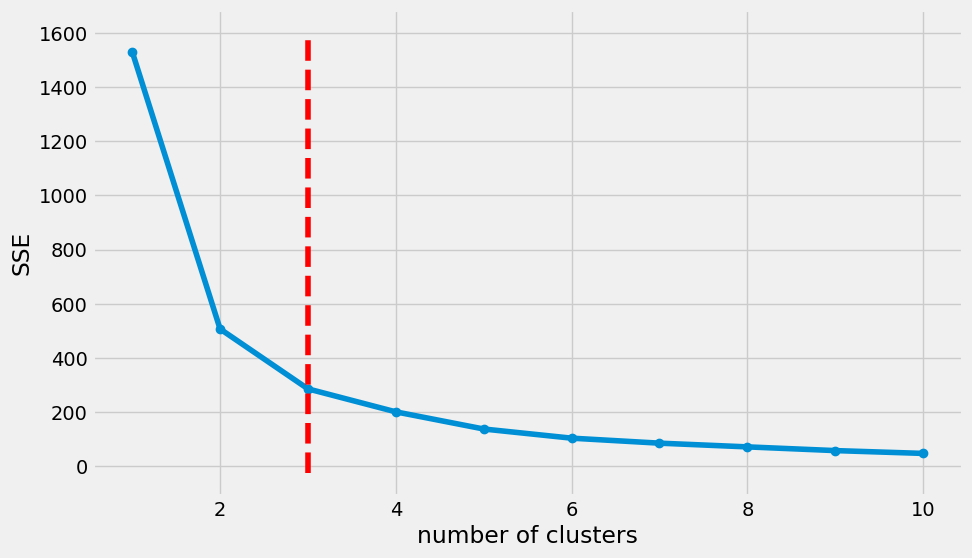

In [49]:
### find ideal number of clusters with SSE

sse_kmeans = []
plt.figure(figsize=(10,6))
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 22)
    kmeans.fit(data)
    sse_kmeans.append(kmeans.inertia_)
plt.plot(range(1, 11), sse_kmeans, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('SSE')

ymin, ymax = plt.ylim()
kl = KneeLocator(range(1, 11), sse_kmeans, curve='convex', direction='decreasing')
plt.vlines(kl.elbow, ymin=ymin, ymax=ymax, colors='red', linestyle='dashed')

plt.show()

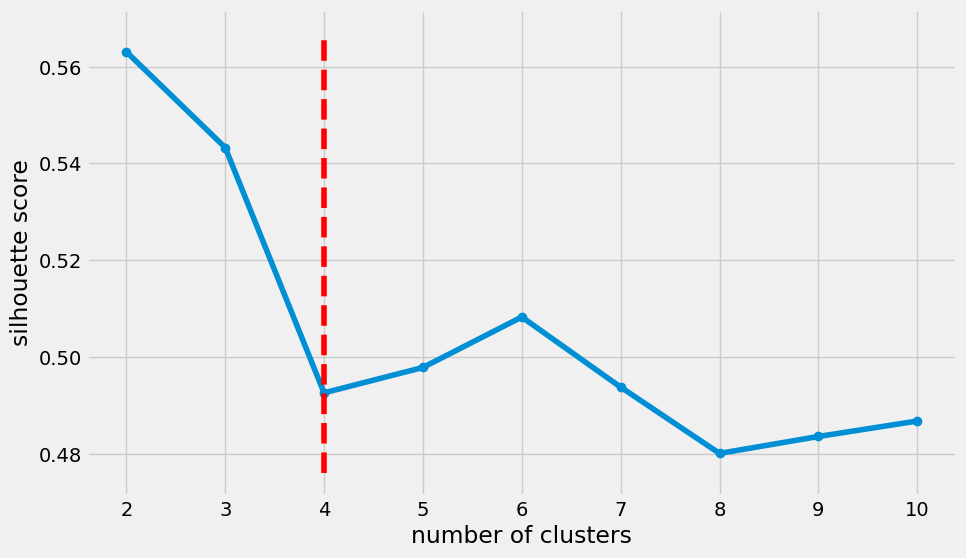

In [50]:
### find ideal number of clusters with silhouette scores

silhouette_scores_kmeans = []
plt.figure(figsize=(10,6))
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 22)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_scores_kmeans.append(score)
plt.plot(range(2, 11), silhouette_scores_kmeans, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')

ymin, ymax = plt.ylim()
kl = KneeLocator(range(2, 11), silhouette_scores_kmeans, curve='convex', direction='decreasing')
plt.vlines(kl.elbow, ymin=ymin, ymax=ymax, colors='red', linestyle='dashed')

plt.show()

In [51]:
def display_images(image_paths):
    # calculate the number of rows and columns for the subplot grid
    num_images = len(image_paths)
    num_cols = 6
    num_rows = (num_images + num_cols - 1) // num_cols  # calculate rows based on num_cols

    # calculate a dynamic figsize based on your desired aspect ratio
    aspect_ratio = 16 / 9  # adjust this ratio as needed
    fig_width = 12  # adjust this width as needed
    fig_height = fig_width / aspect_ratio * num_rows / 3  # adjust 3 for vertical space per row

    # xreate the subplot grid with dynamic figsize
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

    # loop through the image filenames and display them in subplots
    for i, filename in enumerate(image_paths):
        row = i // num_cols
        col = i % num_cols
        img = imread(filename)
        axs[row, col].imshow(img, cmap=plt.cm.binary)
        axs[row, col].axis('off')

    # hide any empty subplots
    for i in range(num_images, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        axs[row, col].axis('off')

    plt.tight_layout()  # adjust subplot spacing
    plt.show()

In [52]:
### cluster with KMeans

# take number of clusters from elbow plot, or define manually
kmeans = KMeans(n_clusters = kl.elbow, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(data)

groups_kmeans = {}
for charter, cluster in zip(charters, clusters):
    if cluster not in groups_kmeans.keys():
        groups_kmeans[cluster] = []
        groups_kmeans[cluster].append(f'/home/tschernn/clustering/preprocessed_imgs/binarized_imgs/{charter[1]}/{charter[0]}')
    else:
        groups_kmeans[cluster].append(f'/home/tschernn/clustering/preprocessed_imgs/binarized_imgs/{charter[1]}/{charter[0]}')

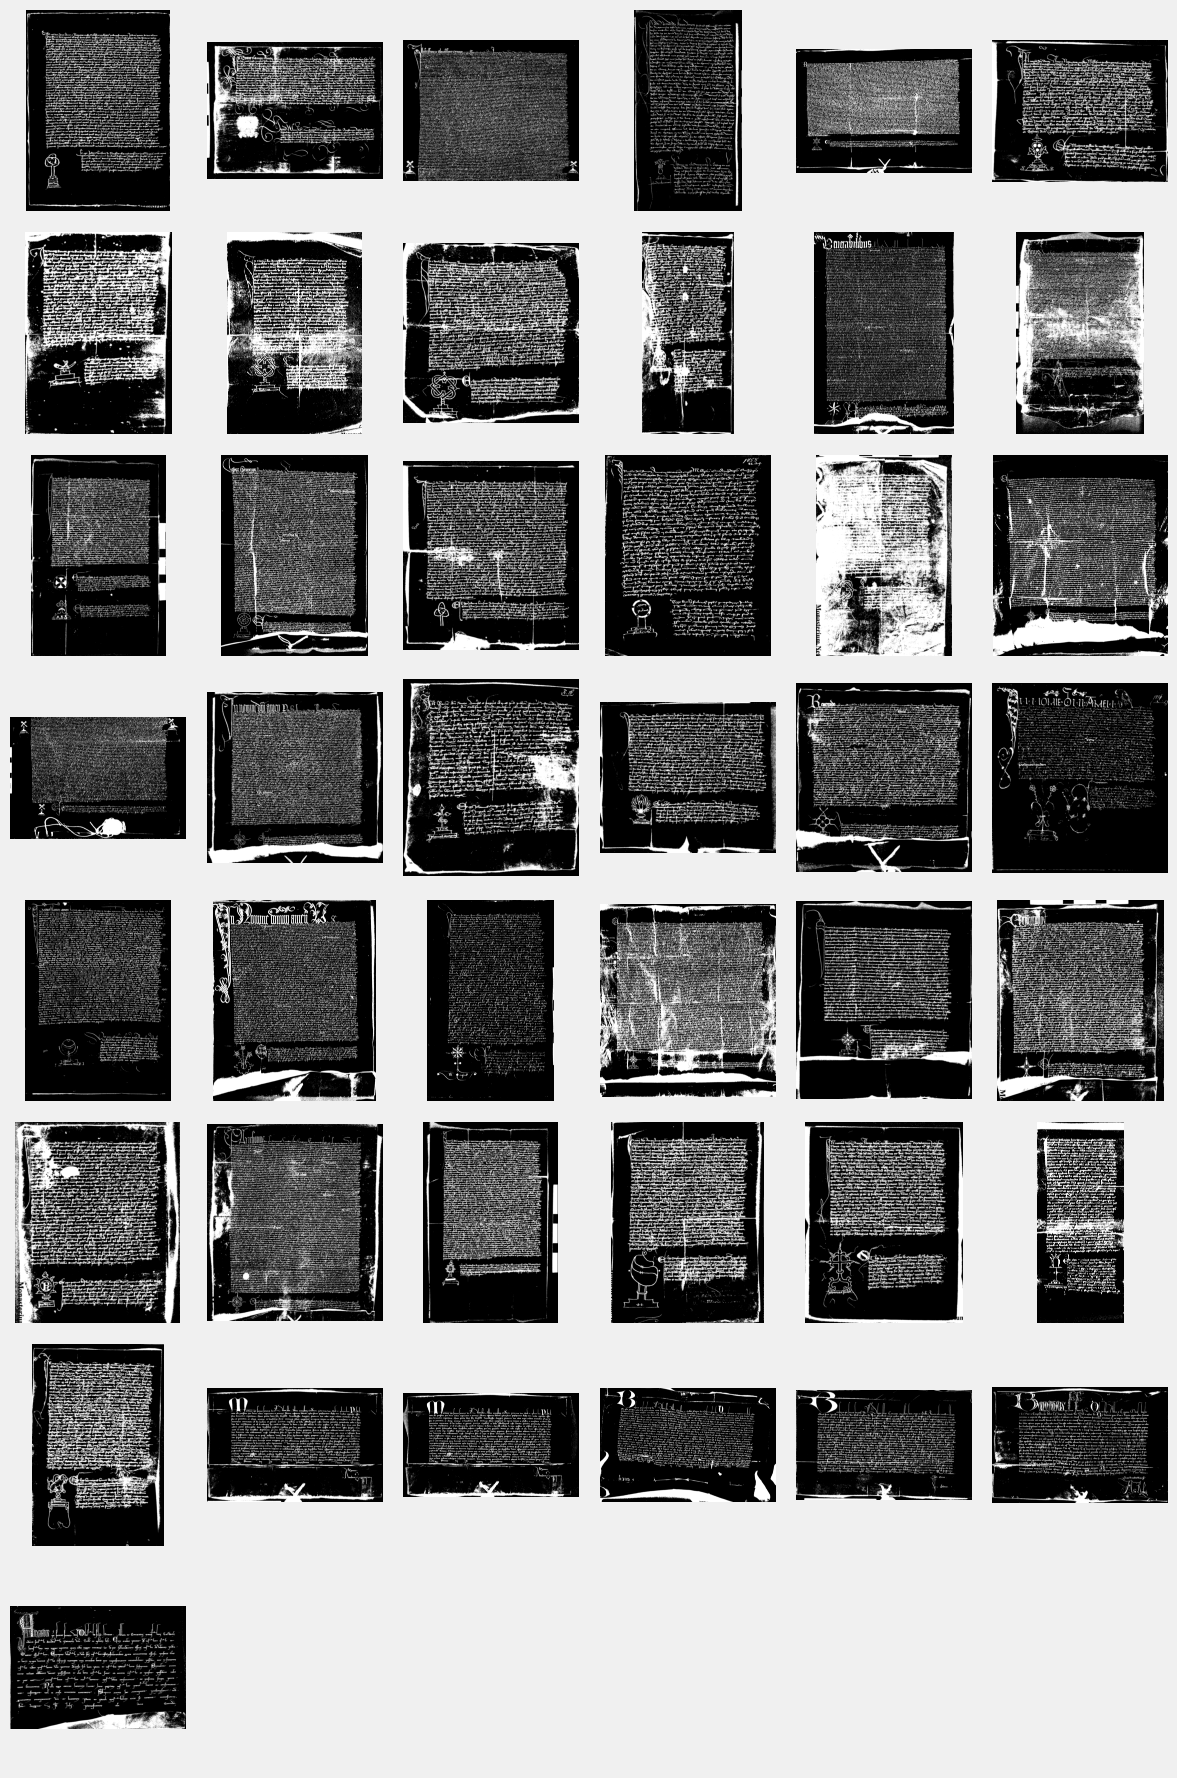

In [53]:
### display image clusters
display_images(groups_kmeans[0])

In [58]:
# list of labels of each dataset
kmeans_labels = kmeans.labels_
u_lbls = np.unique(kmeans_labels) # unique labels
print("List of cluster labels: " + str(u_lbls))

List of cluster labels: [0 1 2 3]


In [59]:
# create list of lists in which each item is added to the label it was clustered to

cluster_index = [[] for i in u_lbls]
for i, label in enumerate(kmeans_labels, 0):
    for n in u_lbls:
        if label == n:
            cluster_index[n].append(i)
        else:
            continue  

In [63]:
groups_kmeans[0]

['/home/tschernn/clustering/preprocessed_imgs/binarized_imgs/writable_area_notar/d76cd762eb569bc4168baf59cc6eb54f.jpg',
 '/home/tschernn/clustering/preprocessed_imgs/binarized_imgs/writable_area_notar/b4c3769d01eecf4c42876353cc1ea34b.jpg',
 '/home/tschernn/clustering/preprocessed_imgs/binarized_imgs/writable_area_notar/6ff434d1321ba755b1383093bd2d7dfe.jpg',
 '/home/tschernn/clustering/preprocessed_imgs/binarized_imgs/writable_area_notar/b17543e821b1c23c914f029c080ffc0c.jpg',
 '/home/tschernn/clustering/preprocessed_imgs/binarized_imgs/writable_area_notar/28c4f9082e4807d0a833c213007d18092.jpg',
 '/home/tschernn/clustering/preprocessed_imgs/binarized_imgs/writable_area_notar/a328506a94ded588b815ceef2f61a66f.jpg',
 '/home/tschernn/clustering/preprocessed_imgs/binarized_imgs/writable_area_notar/656eb0970846e474888641c9907fd463.jpg',
 '/home/tschernn/clustering/preprocessed_imgs/binarized_imgs/writable_area_notar/12057080d755fcd49f1303ce4404c9b6.jpg',
 '/home/tschernn/clustering/preprocesse

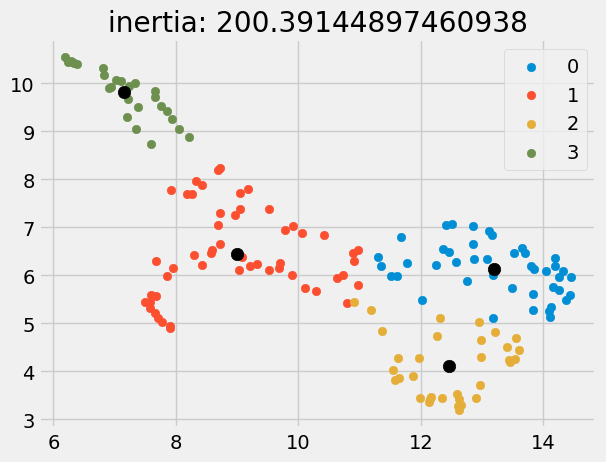

In [60]:
# getting the centroids
centroids = kmeans.cluster_centers_
 
# plotting the points
for i in u_lbls:
    cluster = data[kmeans_labels == i]
    plt.scatter(cluster[:,0], cluster[:,1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.title(f'inertia: {kmeans.inertia_}')
plt.show()

In [57]:
### TODO: evaluation of clustering